<a href="https://colab.research.google.com/github/cykrr/ada/blob/master/informe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análisis del algoritmo MergeSort
## 1.1 Problema de ordenamiento

El problema de ordenamiento consiste en, valga la redundancia, ordenar un
arreglo determinado de menor a mayor, o al revés. Naturalmente este puede
ser resuelto computacionalmente por medio de distintos algoritmos de
variable velocidad. Merge Sort es uno de estos algoritmos y será caso de
estudio en el presente informe. Se implementará el algoritmo así como una
salida detallada del proceso de ordenamiento, se comprobará la correctitud
del mismo y se analizarán sus tiempos de ejecución en relación a otros
algoritmos.

Como todo algoritmo de ordenamiento, MergeSort recibe una entrada $A$ que
se define como una secuencia de $n$ elementos.

$$
A = [a_1, a_2, ..., a_n]
$$

Luego de procesar los datos, se retorna un arreglo $A'$ con sus elementos
ordenados secuencialmente.

$$
A' = [a'_1, a_2', ...,a_n']
$$
$$
a_1' \leq a_2' \leq ... \leq a_n'
$$


## 1.2 Descripción del algoritmo 

Merge Sort está basado en el paradigma de diseño *"divide y conquistarás".* Se
divide repetidamente el arreglo $A$ en subarreglos de longitud $n/2$. Se
ordenan estos subarreglos por medio de recursión (se llama al mismo algoritmo
para que resuelva el subarreglo). Posteriormente estos dos subarreglos son
mezclados para entregar la solución final al problema.

Para implementar el algoritmo entonces es necesario definir dos funciones.
La función `mergeSort(A)` se encargará de recibir el arreglo y de realizar
los llamados recursivos. Mientras que la función `merge(A, left, right)` se
encargará de mezclar dos subarreglos `left, right` en el arreglo principal
$A$.

Con el fin de facilitar el análisis del algoritmo se añadirá un contador
`compareCount` que cuenta el número de comparaciones que realiza la función
`merge`. Así como el contador `mergeCount` que  contará el número de llamadas
recursivas a la función `mergeSort()`;


In [28]:
from termcolor import cprint
compareCount = 0;
mergeCount = 0;

In [58]:


def merge(a, l, r, Verbose = False):
    global compareCount;
    i = j = k = 0
    while (i < len(l) and j < len(r)):
        if Verbose:
          print ("Entre ", end = "")
          cprint(l[i], "red", end = "")
          print (" y ", end = "")
          cprint(r[j], "green", end = "")
          print (" guardamos el ", end = "")
          
        if l[i] > r[j]:
            a[k] = r[j];
            if Verbose:
              cprint (r[j], "red")
            j+=1
        else:
            a[k] = l[i]
            if Verbose:
              cprint (l[i], "green")
            i+=1
        compareCount += 1
        k+=1
    while (len(l) > i):
        if Verbose:
          print("Guardamos el ", end = "")
          cprint (l[i], "green", end = "")
          print (" restante")

        a[k] = l[i]
        compareCount += 1
        i+=1
        k+=1

    while(len(r) > j):
      if Verbose:
        print("Guardamos el ", end = "")
        cprint (r[j], "red", end = "")
        print (" restante")
      compareCount += 1
      a[k] = r[j]
      j+=1
      k+=1

    if Verbose:
      print (a)   
    return a

def mergeSort(a, Verbose = False):
    global mergeCount;
    if compareCount == 0 and Verbose:
      print("Ordenando el arreglo", a);
    n = len(a); # Obtenemos la longitud del arreglo
    if n == 1: return a;
    h = n//2;   # Obtenemos un punto medio en el arreglo


    # Dividimos el arreglo
    m1 = a[:h]  
    m2 = a[h:]
    if Verbose:
      print("Sub-arreglos: ", end = "")
      cprint( str(m1), "red", end=" ")
      cprint (m2, "green")
    
    # Ordenamos los sub-arreglos
    m1 = mergeSort(m1, Verbose)
    m2 = mergeSort(m2, Verbose)

    mergeCount += 2; # Contamos las llamadas recursivas

    return merge(a, m1, m2, Verbose)


## 1.3 Ejemplo

Dado un arreglo $L = [5,4,2,7]$ el ordenamiento por medio de MergeSort consistiría en, primero que nada buscar el punto intermedio $c = n//2$ (división entera). Como $n=4$ obtenemos entonces que $c = 2$. Dividimos el arreglo en el centro. Obteniendo que $L = [5,4]$ y $R = [2,7]$. Volvemos a aplicar la rutina para estos dos subarreglos. 
Dividimos $L$ en dos subarreglos de tamaño $1$ $L_L = [5]$ y $L_R[4]$ y los mezclamos por medio
de la función `merge`. Añadiendo primero el menor obtenemos como resultado que $L = [4,5]$.

Ahora con $R = [2,7]$. Lo dividimos en subarreglos de longitud $1$ $R_L = [2]$ y $R_R = [7]$. Nuevamente los mezclamos por medio de la función `merge`. Obteniendo como resultado el arreglo $R = [2,7]$.

A estas alturas tanto $L$ como $R$ se encuentran ordenados. Por lo que aplicamos `merge` entre ambos.

Comparamos los primeros elementos de cada uno. Entre $4$ y $2$ añademos el dos. Posteriormente comparamos el $7$
con el $4$ anterior, así que añademos el $4$. Hasta ahora tenemos 
el arreglo final $A = [2, 4]$. Nos quedan solamente el $5$ en $L$ y el $7$ en $R$. Añademos el $5$ mientras que terminamos el primer ciclo. Obteniendo que $A = [2, 4, 5]$.

Sin embargo todavía nos queda un elemento. El cual es recogido cuando terminamos el primer ciclo por dos ciclos auxiliaries. Añademos el $7$ y finaliza nuestra función `merge` y por tanto nuestro ordenamiento. Obtenemos que $A = [2,4, 5, 7]$.

## 1.4 Ejemplo de ejecución con `Verbose`

In [38]:
mergeCount = 0;
mergeSort([5,4,2,7], True)

Sub-arreglos: [5, 4] [2, 7]
Sub-arreglos: [5] [4]
Entre 5 y 4 guardamos el 4
Guardamos el 5 restante
[4, 5]
Sub-arreglos: [2] [7]
Entre 2 y 7 guardamos el 2
Guardamos el 7 restante
[2, 7]
Entre 4 y 2 guardamos el 2
Entre 4 y 7 guardamos el 4
Entre 5 y 7 guardamos el 5
Guardamos el 7 restante
[2, 4, 5, 7]


[2, 4, 5, 7]

MergeSort consiste en dividir el arreglo en dos subarreglos de tamaño $n/2$
los cuales son ordenados dividiéndose en dos subarreglos cada uno (de longitud
$n/4, n/8, ..., 1$). Así sucesivamente hasta llegar al caso base. El cual se da
cuando la longitud del subarreglo a ordenar es de $1$ (que está ordenado).
La función `merge` recibe los subarreglos y los ordena. Para esto
recorre cada subarreglo por separado y compara sus elementos, añadiendo el menor.


## 1.5 Correctitud de la subrutina `merge`

El índice $k$ nos indica la posición actual por la
que nos desplazamos en el arreglo de salida $A$,
que está formado por los elementos $A[k .. n]$ siendo $n$ la suma entre $n_1$
y $n_2$, que son la longitud del subarreglo ordenado izquierdo $L$ y  el derecho
$R$ respectivamente.

Planteamos como invariante de ciclo que el subarreglo $A[0..k]$ siempre estará ordenado.

**Inicialización**: En una primera instancia el arreglo $A$ se encuentra vacío,
así que está completamente ordenado. $k = 0$ por lo que el subarreglo $A[0..k]$
tiene 0 elementos.

**Mantención**: En la posición $k$ del arreglo $A$ se almacenará el menor de los
elementos de los arreglos $L$ y $R$. Sabemos que estamos trabajando con el menor
elemento ya que el arreglo $L$ y $R$ fueron previamente ordenados por la función
`mergeSort()`.

**Finalización**: El ciclo finaliza cuando $k= n_1 + n_2$. A estas alturas
el subarreglo ordenado $A[0..k]$ constituye la totalidad del arreglo $A$. Por
lo que la totalidad de $A$ está ordenado.

## 1.6 Correctitud de la rutina mergeSort()

Probar la correctitud de la función merge es un gran paso para saber si el
algoritmo mergeSort es correcto. Definimos $P(n)$ como la hipótesis de que
la función mergeSort ordena una secuencia de $n$ elementos de menor a mayor.

### 1.6.3 Caso base 

Establecemos como caso base $P(1)$ como ordenar una secuencia de un elemento.
Naturalmente, este arreglo está ordenado. Por lo que se cumple $P$ para $P(1)$.


### 1.6.2 Paso inductivo

Definimos $m$ como un tamaño de un subarreglo menor a $n$. Como por ejemplo
$n/2$. Deducimos que $P(m)$ es correcto ya que sabemos que la función
`merge` es correcta, lo que quiere decir que podemos asumir que los subarreglos
han sido ordenados de manera correcta (Sabiendo que se construye desde el
caso base). Debido a que $P(m)$ es correcto podemos concluir que $P(n)$ lo es.
Ya que $m<n$.



## 1.7 Tiempo de ejecución del algoritmo

Definimos $T(n)$ como aquella función que nos retorna el tiempo de ejecución
de la función `mergeSort()`. Como sabemos, la función `mergeSort` realiza dos
llamadas recursivas y una llamada a la función `merge`.

### 1.7.1 Tiempo de ejecución de la subrutina `merge`

La función Merge busca el menor elemento entre los dos arreglos iterándolos
hasta que uno de los dos se acabe por medio de un ciclo while el cual toma
$O(n_1 || n_2)$ = $O(n)$. Para finalizar otro ciclo while recorre los $n$
elementos restantes. De esto obtenemos que el tiempo de ejecución de la
función merge es $O(n)$


### 1.7.2 Tiempo de ejecución de la rutina `mergeSort`

Ahora que se conoce el tiempo de ejecución de Merge sabemos que el
tiempo de ejecución de mergeSort $T(n)$ está condicionado por dos llamadas
recursivas $T(n/2)$ así como de la función merge de tiempo $O(n)$. Quedando
de la siguiente manera (descartamos aquellas instrucciones de tiempo constante $c$)

$$
T(n) = T(n/2) + T(n/2) + O(n)
$$

$$
T(n) = 2T(n/2) + O(n)
$$

Podemos obtener el tiempo de ejecución de la función `mergeSort` analizando su
árbol de recursividad


![](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

Observemos que la suma de cada nivel es de $cn$. Como la función `mergeSort`
divide cada subarreglo en dos partes de longitud $n/2$ hasta llegar al caso
base, podemos decir que la altura de este árbol es de $log(n)$. Por lo que
el tiempo de ejecución total sería base por altura $cn \cdot log(n)$. De
esto concluimos que el tiempo de ejecución de la función `mergeSort` es de
$O(n\log(n))$.


## 1.8 Experimentos

### 1.8.1. Variación entre el número de comparaciones con el mejor y peor caso teóricos




In [ ]:
from random import randint, sample
from matplotlib import pyplot as plt
from math import log2
samples = 500;

worst = best = [n * log2(n) for n in range(1, samples)];


x = [n for n in range(1, samples)];
out = []

for n in range (1, samples):
    
    a = sample(range(1, samples), n)
#    print("n", n, a)
    compareCount = 0
    mergeSort(a);
    # print(compareCount)
    out.append(compareCount)

plt.plot (x, worst)
plt.plot (x, best)
plt.plot(x, out)
plt.legend(["Peor caso", "Mejor caso", "MergeSort"])
plt.show()

#### 1.8.1.1 Peor caso teórico

El peor caso se dará cuando mergeSort tenga que realizar la mayor cantidad de
comparaciones. Esto se da cuando los subarreglos $L$ y $R$ tienen elementos
alternados entre sí. Consideremos por ejemplo los arreglos $L = [1,3,5]$ y
$R = [2,4,6]$. En este caso cada elemento deberá ser comparado al menos una
vez con cada elemento


#### 1.8.1.2 Mejor caso teórico 

El mejor caso se da cuando el mayor elemento de uno de los subarreglos es menor
que el primer elemento del otro subarreglo. Esto reduce el número de comparaciones
de cada paso en el Merge a $n/2$.

Si bien tanto el mejor como el peor caso presentan variaciones en el tiempo de ejecución
En la función merge, estas variaciones no son suficientes para cambiar el tiempo
de ejecución del algoritmo. Es decir, tanto como para el mejor como para el peor
caso el tiempo de ejecución de la subrutina merge seguirá siendo $O(n)$.



### 1.8.2 Comparación con la rutina insertionSort


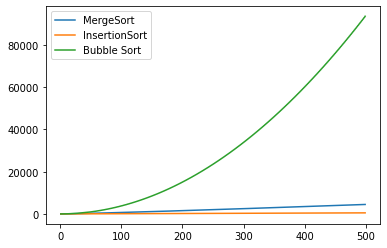

In [86]:

def b_sort(A):
    global compareCount;
    aux = 0
    for i in range (len(A) - 1):
        swap = False
        for j in range (len(A) - i - 1):
            compareCount += 1
            aux+=1
            if (A[i] < A[j]):
                A[i], A[j] = A[j], A[i]
                swap = True
        if not swap:
            return aux
    return aux
def ins_sort(A):
    global compareCount;
    aux = 0 
    for i in range(len(A)):
        j = i
        aux +=1
        while (A[j] < A[j-1] and j > 0):
            A[j], A[j-1] = A[j-1], A[j]
            aux +=1
            j -=1
    return aux;

def merge2(a, l, r):
    global compareCount;
    i = j = k = 0
    while (i < len(l) and j < len(r)):
        if l[i] > r[j]:
            a[k] = r[j];
            j+=1
        else:
            a[k] = l[i]
            i+=1
        compareCount += 1
        k+=1
    while (len(l) > i):
        compareCount += 1
        #print("outer", l[i])
        a[k] = l[i]
        i+=1
        k+=1

    while(len(r) > j):
        compareCount += 1
        #print("outer", r[j])
        a[k] = r[j]
        j+=1
        k+=1
    return a

def merge_sort(a):
    global mergeCount;
    n = len(a); # Obtenemos la longitud del arreglo
    if n == 1: return a;
    h = n//2;   # Obtenemos un punto medio en el arreglo


    # Dividimos el arreglo
    m1 = a[:h]  
    m2 = a[h:]

    #print(a, m1, m2)
    
    # Ordenamos los sub-arreglos
    m1 = merge_sort(m1)
    m2 = merge_sort(m2)

    mergeCount += 2; # Contamos las llamadas recursivas

    return merge2(a, m1, m2)
    


x = [n for n in range(1, samples)];
out = []
out2 = []
out3 = []

for n in range (1, samples):
    
    a = sample(range(1, samples), n)
#    print("n", n, a)
    compareCount = 0
    merge_sort(a);
#    print(compareCount)
    out.append(compareCount)
    out2.append(ins_sort(a))
    out3.append(b_sort(a))


plt.plot(x, out)
plt.plot(x, out2)
plt.plot(x, out3)
plt.legend(["MergeSort", "InsertionSort", "Bubble Sort"])
plt.show()


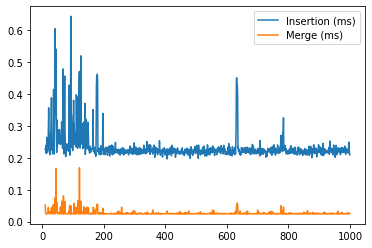

In [99]:
from timeit import repeat
x = [n for n in range(10, 1000)]
ym = []
yi = []
for i in range(10, 1000):
   a = sample(range(1, samples), n)
   t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)
   ym.append(t)
   t = repeat(setup = "from __main__ import ins_sort", stmt = f"ins_sort({a})", repeat = 1, number = 10)
   yi.append(t)
plt.plot(x, yi)
plt.plot(x, ym)
plt.legend(["Insertion (ms)", "Merge (ms)"])
plt.show()

### 1.8.3 Análisis e interpretación de la información

Si bien se puede asumir en una primera instancia que insertionSort es más rápido
al graficar el número de comparaciones, lo cierto es que si analizamos el tiempo de
ejecución es muchos ordenes menor el de MergeSort. Esto es debido a que el 
algoritmo mergeSort tiene una complejidad menor de $O(nlog_2(n))$ A diferencia
de $O(n^2)$ En el caso promedio del InsertionSort

En el primer gráfico observamos que no hay variación entre un caso cualquiera y el mejor / peor caso. Esto es debido a que, independiente del orden del arreglo su complejidad seguirá siendo $O(nlog_2(n)$.